In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import  *
from pyspark.sql import SQLContext
#Zonder schema wordt de namen van de column onduidelijk zoals col1,col2 ....
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

income_schema = StructType([StructField("ID Year", StringType(), True),
                            StructField("Year", StringType(), True),
                            StructField("Income", IntegerType(), True),
                            StructField("Household Income by Race Moe", StringType(), True),
                            StructField("Geography", StringType(), True),
                            StructField("ID Geography", StringType(), True),
                            StructField("Slug", StringType(), True)])


spark = SparkSession.builder\
                    .master("local[*]")\
                    .config("spark.execute.memory", "1gb")\
                    .appName('Analyzing  chicago Crime data')\
                    .getOrCreate()

crimes = spark.read.csv("./data/city_of_chicago_crimes_2001_to_present.csv",
                       header = True, 
                        schema = crimes_schema)



income = spark.read.csv("./data/ChicagoHouseholdIncome.csv", header = True, schema = income_schema)


sc = spark.sparkContext
sqlContext =SQLContext(sc)

In [2]:
crimes.select('ID','CaseNumber',"Date",'Block','PrimaryType','Description').show(10,truncate=False)

+--------+----------+----------------------+---------------------+------------------+------------------------------+
|ID      |CaseNumber|Date                  |Block                |PrimaryType       |Description                   |
+--------+----------+----------------------+---------------------+------------------+------------------------------+
|11857135|JC468110  |10/10/2019 11:39:00 PM|053XX S LAWNDALE AVE |BATTERY           |DOMESTIC BATTERY SIMPLE       |
|11857005|JC468117  |10/10/2019 11:38:00 PM|040XX W LEXINGTON ST |NARCOTICS         |SOLICIT NARCOTICS ON PUBLICWAY|
|11857045|JC468132  |10/10/2019 11:34:00 PM|048XX S ELIZABETH ST |DECEPTIVE PRACTICE|UNAUTHORIZED VIDEOTAPING      |
|11857374|JC468411  |10/10/2019 11:31:00 PM|0000X N LATROBE AVE  |CRIMINAL DAMAGE   |TO VEHICLE                    |
|11857461|JC468482  |10/10/2019 11:30:00 PM|048XX W CHICAGO AVE  |ROBBERY           |AGGRAVATED                    |
|11857494|JC468546  |10/10/2019 11:30:00 PM|023XX N KEYSTONE AVE

In [3]:
crimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [4]:
crimes.select('Date').show(10,truncate=False)

+----------------------+
|Date                  |
+----------------------+
|10/10/2019 11:39:00 PM|
|10/10/2019 11:38:00 PM|
|10/10/2019 11:34:00 PM|
|10/10/2019 11:31:00 PM|
|10/10/2019 11:30:00 PM|
|10/10/2019 11:30:00 PM|
|10/10/2019 11:24:00 PM|
|10/10/2019 11:23:00 PM|
|10/10/2019 11:20:00 PM|
|10/10/2019 11:15:00 PM|
+----------------------+
only showing top 10 rows



In [5]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df =crimes.withColumn('Date_time',myfunc(col('Date'))).drop('Date')
df.select(df["Date_time"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2019-10-10 23:39:00|
|2019-10-10 23:38:00|
|2019-10-10 23:34:00|
|2019-10-10 23:31:00|
|2019-10-10 23:30:00|
+-------------------+
only showing top 5 rows



In [6]:
#data = df.groupBy('Year').count().show()
data =df.groupBy('Year').count().sort('Year').collect()
count = [item[1] for item in data]
year = [item[0] for item in data]
data

[Row(Year=2001, count=485760),
 Row(Year=2002, count=486758),
 Row(Year=2003, count=475949),
 Row(Year=2004, count=469390),
 Row(Year=2005, count=453717),
 Row(Year=2006, count=448120),
 Row(Year=2007, count=437027),
 Row(Year=2008, count=427071),
 Row(Year=2009, count=392724),
 Row(Year=2010, count=370354),
 Row(Year=2011, count=351819),
 Row(Year=2012, count=336051),
 Row(Year=2013, count=307178),
 Row(Year=2014, count=275395),
 Row(Year=2015, count=264247),
 Row(Year=2016, count=269203),
 Row(Year=2017, count=268371),
 Row(Year=2018, count=267527),
 Row(Year=2019, count=202191)]

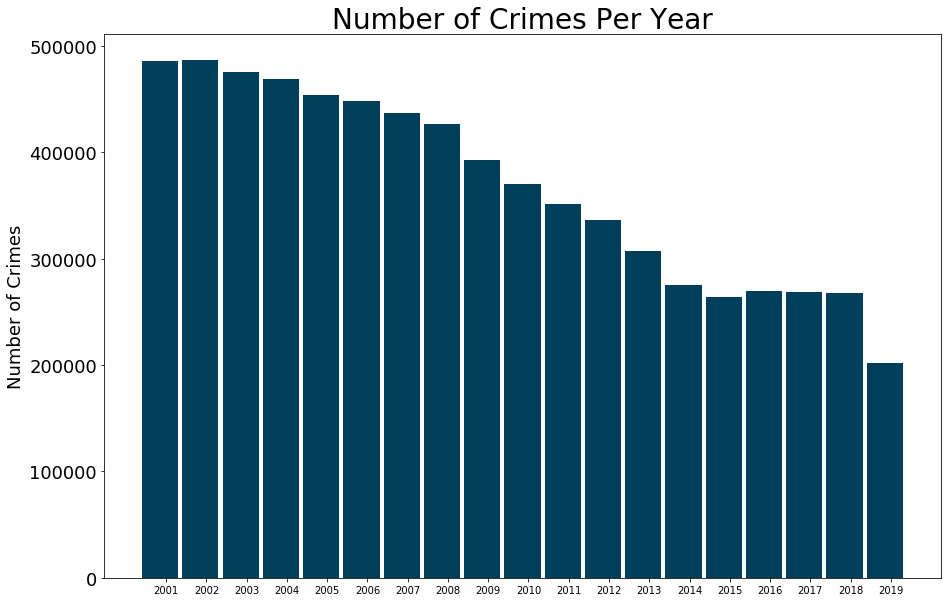

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

#years = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
y_axis= [i for i in count]
x_axis = [i for i in year]

X = np.arange(len(year))
data = [x_axis ,y_axis]


fig1 = plt.figure(figsize=(15, 10))
ax = plt.gca()
plt.bar(X - 0.15, data[1], color = '#003f5c', width = 0.9,label='chicago')
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
ax = plt.gca()
plt.xticks(X,(year))
plt.yticks(size = 18)
plt.show()


In [ ]:
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month('Date_time'))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts = monthCounts.collect()
monthCounts

In [ ]:
monthCounts.sort()
months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
monthCounts

In [ ]:
#month = ['Jan','Feb','Mrt','Apr','Mei','Jun','Jul','aug','sep','okt','nov','dec']
y_axis= [i for i in count]
x_axis = [i for i in months]
fig = plt.figure(figsize=(10,8))

data = [x_axis ,y_axis]

X = np.arange(1,13,1)

plt.plot(X + 0.00, data[1], color = 'red',linewidth = 3, label='chicago')
plt.xticks(X)
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [ ]:
crime_location  = crimes.groupBy("LocationDescription").count().sort('count', ascending  = False).limit(20).collect()
crime_location

In [ ]:
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]

In [ ]:
x_axis = [i for i in location] 
y_axis= [i for i in count]

fig = plt.figure(figsize=(20,20))
fig.suptitle('Number of Crimes Per year', fontsize=36)
 
plt.xlabel("Number of Crimes", fontsize = 28)
plt.ylabel("Crimes Location", fontsize = 28)
plt.barh(x_axis,y_axis,color = "red")
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [ ]:
crime_Coordinates  = crimes.groupBy("Latitude","longitude").count().sort('count', ascending  = False).limit(50).collect()
crime_Coordinates.pop(0)
map_location = [[item[0],item[1],item[2]] for item in crime_Coordinates]
long_lat=[[item[0],item[1]] for item in map_location]       
long_lat.pop(0)
count=[item[2] for item in map_location]
map_location

In [ ]:
import folium
from folium.plugins import HeatMap
first_map = folium.Map(location=[41.885487535, -87.726422045], zoom_start=13)
HeatMap(long_lat,name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=10, gradient=None, overlay=True, control=True, show=True).add_to(first_map)

first_map

In [ ]:
yearCount = crimes.groupBy("YEAR").count().orderBy("YEAR")#.groupBy("YEAR").count().orderBy("YEAR").show()

In [ ]:
income.show()

In [ ]:
income.registerTempTable('chicagoIncome')

chicagoIncomeData = sqlContext.sql("Select * From chicagoIncome where Slug Like 'chicago%'").groupBy("Year").sum("income").orderBy('Year')
chicagoIncomeData.show()

In [ ]:
chicago_year_count=crimes.groupBy("YEAR").count().orderBy("YEAR")#.groupBy("YEAR").count().orderBy("YEAR").show()

In [ ]:
chicago_year_count.show()

In [ ]:
import numpy as np 
x_axies = [i[0] for i in chicagoIncomeData.select("sum(Income)").limit(5).collect()]
y_axies = [i[1] for i in chicago_year_count.filter('YEAR >= 2013 AND YEAR <= 2018').orderBy("YEAR").limit(5).collect()]

data = [x_axies, y_axies]
years = ["2013","2014","2015","2016","2017"]
X = np.arange(len(years))

plt.title('Crime VS incom in chicago', fontsize=20)
plt.bar(X + 0.15, data[1], color = '#ff5252', width = 0.30, label = 'Crime ')
plt.bar(X - 0.15, data[0], color = '#9dff52', width = 0.30, label = 'Income')

ax = plt.gca()
ax.legend(shadow=True)
plt.xticks(X,(years))
plt.show()